# Histogram of Predicted Uncertainties

This plots data written by the `process_uncertainties.py` script.

In [2]:
import sys

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sys.path.append("..")
from constants import MIN_DAYSAHEAD, MAX_DAYSAHEAD, BIN_FREQ_PER_DAY

sns.set()

In [5]:
dfs = {}

for i in range(MIN_DAYSAHEAD, MAX_DAYSAHEAD + 1):
    dfs[i] = pd.read_csv(
        f"../data/processed/method2/k20/delta_window4/processed_daysahead{i}_R000.csv"
    )

dfs[1].head()

,current_time,forward_time0,Vp_pred0,Vp_obs0,sigma0,crps0,forward_time1,Vp_pred1,Vp_obs1,sigma1,...,forward_time2,Vp_pred2,Vp_obs2,sigma2,crps2,forward_time3,Vp_pred3,Vp_obs3,sigma3,crps3
0,2010-01-02 18:00:00,2010-01-03 00:00:00,399.20,270.411667,100.283037,81.651161,2010-01-03 06:00:00,382.05,286.081667,86.031193,...,2010-01-03 12:00:00,376.450000,291.251667,68.567202,53.559233,2010-01-03 18:00:00,369.400000,296.688333,70.225857,44.025037
1,2010-01-03 00:00:00,2010-01-03 06:00:00,382.05,286.081667,96.705890,57.757470,2010-01-03 12:00:00,376.45,291.251667,83.033125,...,2010-01-03 18:00:00,369.400000,296.688333,71.250601,43.928963,2010-01-04 00:00:00,359.800000,308.626667,55.580558,30.562056
2,2010-01-03 06:00:00,2010-01-03 12:00:00,376.45,291.251667,78.352315,52.016907,2010-01-03 18:00:00,369.40,296.688333,71.007800,...,2010-01-04 00:00:00,359.800000,308.626667,58.690991,30.468586,2010-01-04 06:00:00,370.450000,305.146667,81.993098,38.879670
3,2010-01-03 12:00:00,2010-01-03 18:00:00,369.40,296.688333,66.020336,44.500044,2010-01-04 00:00:00,359.80,308.626667,64.564372,...,2010-01-04 06:00:00,370.450000,305.146667,87.786165,39.048639,2010-01-04 12:00:00,363.533333,269.310000,100.210922,56.371830
4,2010-01-03 18:00:00,2010-01-04 00:00:00,359.80,308.626667,58.775715,30.467035,2010-01-04 06:00:00,370.45,305.146667,63.499517,...,2010-01-04 12:00:00,363.533333,269.310000,87.500571,57.425305,2010-01-04 18:00:00,362.200000,280.318333,98.043528,48.711921


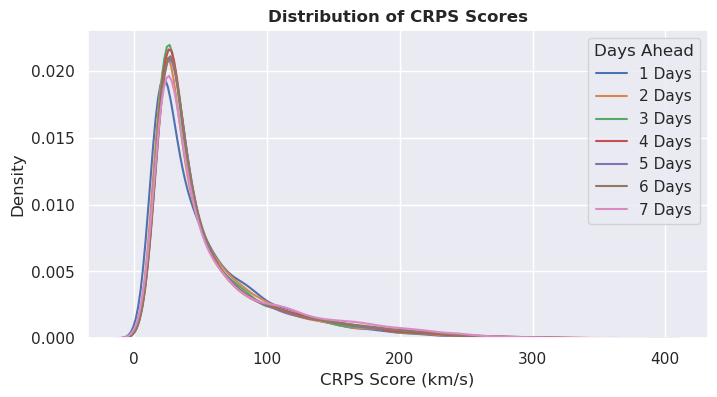

In [6]:
df_list = []


plt.figure(figsize=(8, 4))
for daysahead, df in dfs.items():
    idx = BIN_FREQ_PER_DAY * daysahead - 1
    sns.kdeplot(df[f"crps{idx}"], label=f"{daysahead} Days")

plt.xlabel(r"CRPS Score (km/s)")
plt.legend()
plt.gca().get_legend().set_title("Days Ahead")
plt.title("Distribution of CRPS Scores", fontweight="bold")

plt.savefig("../plots/crps_summary.png", dpi=300)